### Loading Python libraries

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot

In [2]:
!pip install pmdarima

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

### Loading data

In [4]:
import yfinance as yf
import datetime

ticker = 'LT.NS'
start_date = datetime.datetime(2022, 1, 3)
end_date = datetime.datetime(2024, 2, 1)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1895.000000,1937.449951,1893.650024,1922.849976,1894.265625,1906676
2022-01-04,1922.849976,1943.000000,1914.550049,1937.550049,1908.747192,1643920
2022-01-05,1940.699951,1951.000000,1927.650024,1948.599976,1919.632812,1711667
2022-01-06,1944.500000,1953.000000,1919.599976,1924.500000,1895.891113,1372015
2022-01-07,1929.050049,1934.949951,1897.150024,1904.900024,1876.582520,1447123
...,...,...,...,...,...,...
2024-01-24,3570.000000,3617.949951,3521.699951,3589.199951,3589.199951,3711521
2024-01-25,3599.899902,3618.250000,3564.800049,3593.449951,3593.449951,2206540
2024-01-29,3604.000000,3733.850098,3600.100098,3708.000000,3708.000000,2072982


In [6]:
df.shape

(515, 6)

### Opening price

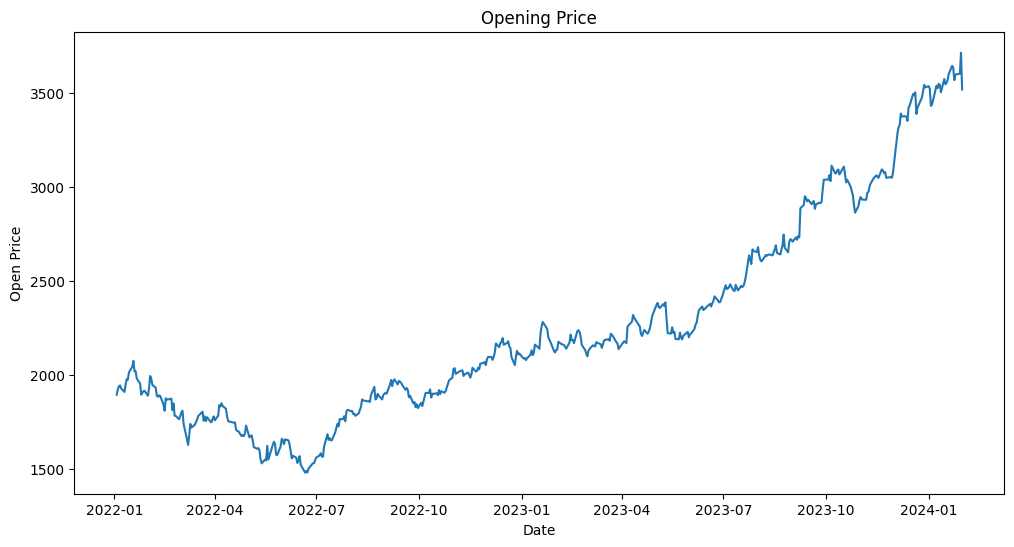

In [7]:
fig = plt.figure(figsize = (12,6))
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

### Closing price

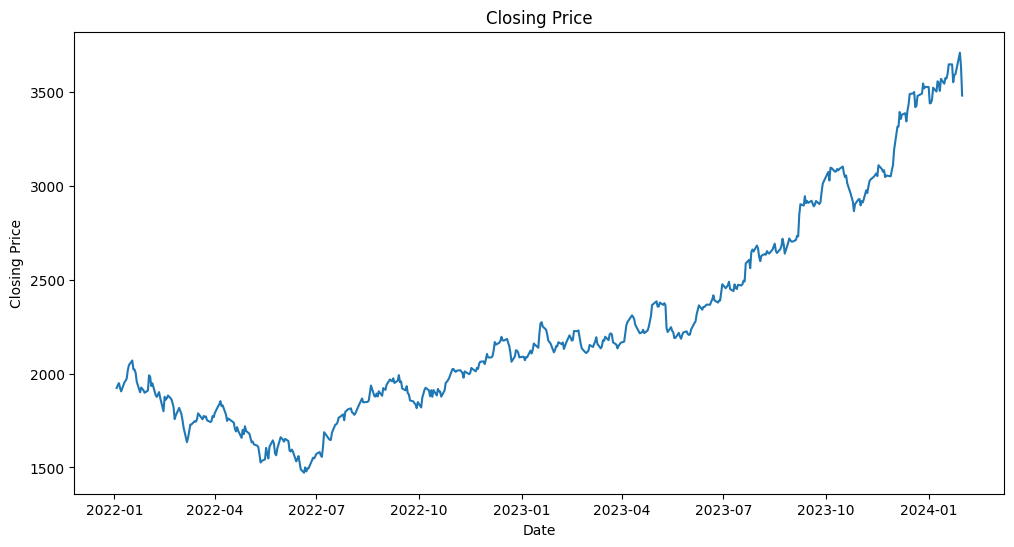

In [8]:
fig = plt.figure(figsize = (12,6))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### Training & Testing Data

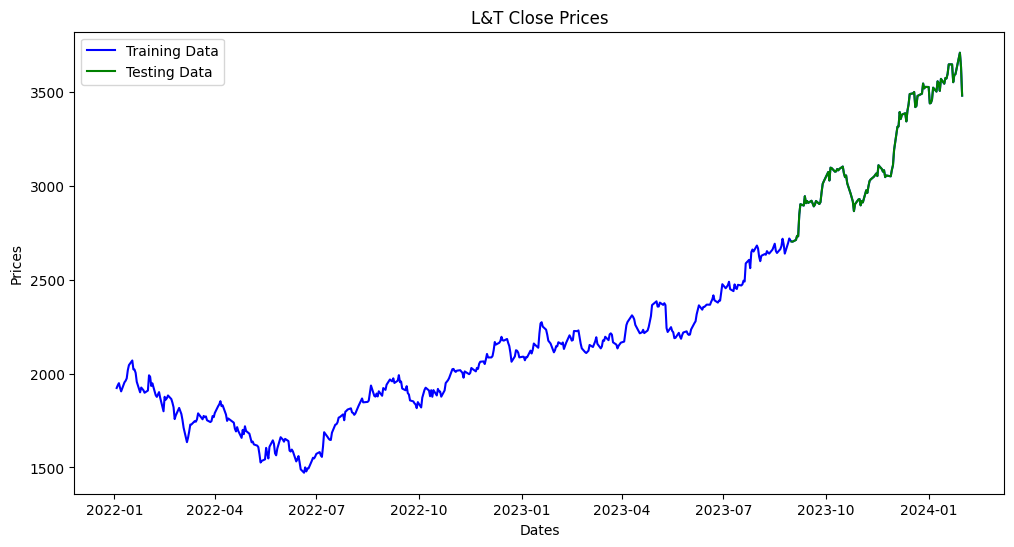

In [9]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,6))
plt.title('L&T Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [15]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


In [16]:
error = mean_squared_error(test_ar, predictions)
print('MSE: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('SMAE: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("RMSE:", rmse)
print("MAE:", mae)


MSE: 1975.040
SMAE: 1.017
RMSE: 44.44142200388743
MAE: 32.71330016145768


### Prediction

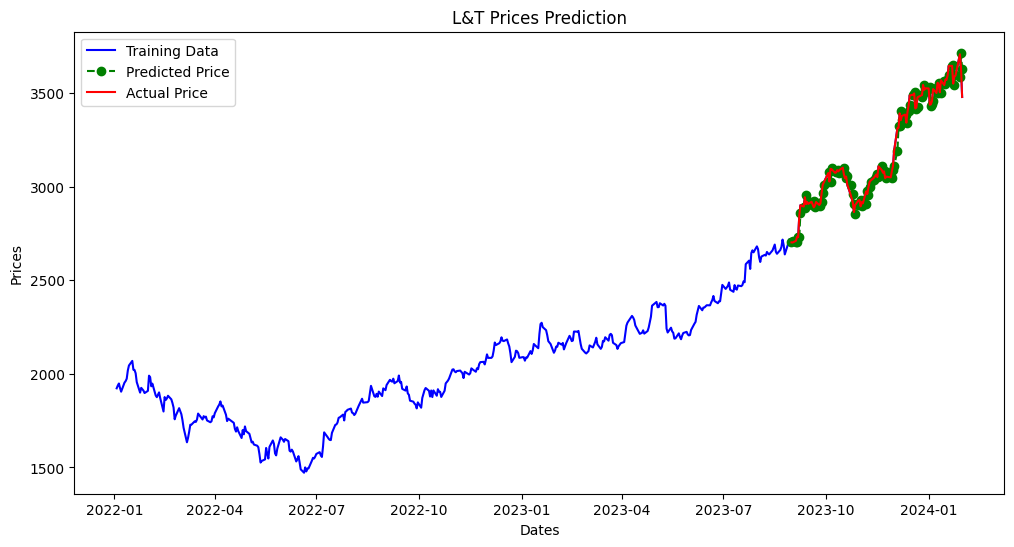

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('L&T Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

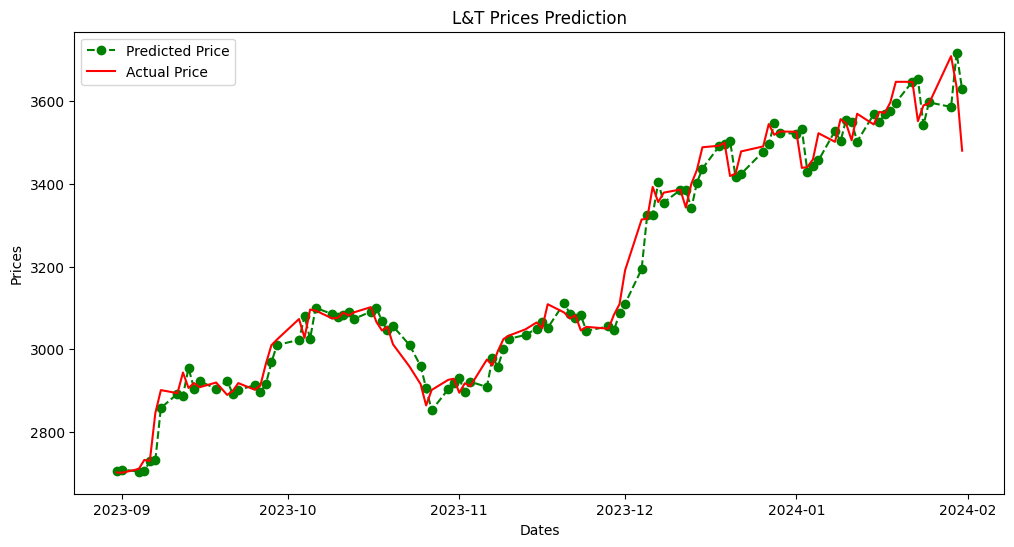

In [18]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('L&T Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [19]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.tail(10))

          Actual    Predicted
93   3570.949951  3569.353991
94   3596.000000  3575.456279
95   3646.000000  3595.960334
96   3646.000000  3646.431067
97   3551.000000  3652.786472
98   3589.199951  3541.204402
99   3593.449951  3596.405158
100  3708.000000  3585.303856
101  3633.300049  3716.264777
102  3479.750000  3627.484768


In [20]:
import numpy as np

def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Assuming 'actual' and 'predicted' DataFrames are defined as in your code
accuracy_smape = 100 - smape(actual['Actual'], predicted['Predicted'])

print('SMAPE Accuracy:', accuracy_smape)


SMAPE Accuracy: 98.98300864357154
